<a href="https://colab.research.google.com/github/Mainabryan/agriculture_yield_model/blob/main/Kenya_maize_yield.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import the required libraries

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

#Load the datset

In [2]:
data =pd.read_csv('/content/Kenya_Maize_Yield_Dataset.csv')

##Exploratory Data Analysis

In [3]:
data.head()

,Region,County,SubCounty,Soil_Quality,Avg_Rainfall_mm,Avg_Temperature_C,Altitude_meters,Fertilizer_Usage_kg_per_acre,Fertilizer_Type,Seed_Type,Farming_Method,Pest_Attack_Level,Prev_Season_Yield,Farming_Experience_Years,Planting_Season,Year,Current_Yield_tonnes_per_hectare
0,Rift Valley,Nakuru,Nakuru Sub-East,2,649.671415,22.723471,2130,57.107913,Mixed,GMO,Manual,Low,3.184225,26,Short Rains,2022,7.0
1,Eastern,Kitui,Kitui Sub-North,4,701.051528,21.838244,1276,42.122453,Mixed,GMO,Mechanized,Low,3.231189,29,Long Rains,2023,7.0
2,Eastern,Embu,Embu Sub-South,3,427.508217,21.875425,2082,42.022739,Inorganic,GMO,Mechanized,NaN,2.441262,28,Short Rains,2021,7.0
3,Western,Busia,Busia Sub-West,2,386.037934,21.741050,2267,58.965807,Inorganic,Indigenous,Mechanized,NaN,2.227809,19,Long Rains,2021,7.0
4,Eastern,Embu,Embu Sub-East,2,547.487715,26.825543,2297,40.996192,Mixed,Hybrid,Manual,NaN,2.973720,21,Long Rains,2023,7.0


In [4]:
data.tail()

,Region,County,SubCounty,Soil_Quality,Avg_Rainfall_mm,Avg_Temperature_C,Altitude_meters,Fertilizer_Usage_kg_per_acre,Fertilizer_Type,Seed_Type,Farming_Method,Pest_Attack_Level,Prev_Season_Yield,Farming_Experience_Years,Planting_Season,Year,Current_Yield_tonnes_per_hectare
495,Nyanza,Kisumu,Kisumu Sub-South,5,664.912014,26.885336,1976,42.739145,Mixed,Indigenous,Mechanized,Moderate,2.938023,14,Short Rains,2021,7.0
496,Nyanza,Kisumu,Kisumu Sub-South,1,533.577582,24.763199,1795,37.697347,Inorganic,Indigenous,Manual,Low,1.874311,8,Long Rains,2023,7.0
497,Nyanza,Siaya,Siaya Sub-North,3,602.780292,22.849241,1922,60.519385,Inorganic,Indigenous,Manual,Severe,1.952300,14,Short Rains,2023,7.0
498,Rift Valley,Baringo,Baringo Sub-East,4,684.901091,22.789526,2273,53.964467,Organic,Indigenous,Manual,NaN,2.862600,8,Short Rains,2021,7.0
499,Nyanza,Siaya,Siaya Sub-North,5,616.666169,24.132172,1463,60.485204,Organic,Indigenous,Manual,Moderate,2.402161,9,Long Rains,2022,7.0


In [5]:
data.describe()

,Soil_Quality,Avg_Rainfall_mm,Avg_Temperature_C,Altitude_meters,Fertilizer_Usage_kg_per_acre,Prev_Season_Yield,Farming_Experience_Years,Year,Current_Yield_tonnes_per_hectare
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,2.890000,601.113747,22.967695,1746.092000,51.129805,2.517535,15.360000,2022.024000,6.995520
std,1.380475,102.910990,1.974223,437.423477,15.227721,0.499830,8.515835,0.820225,0.060213
min,1.000000,305.961137,17.302915,1002.000000,4.707318,0.760915,1.000000,2021.000000,5.940000
25%,2.000000,533.458816,21.659263,1362.000000,41.268497,2.174530,8.000000,2021.000000,7.000000
50%,3.000000,605.459679,22.998449,1749.000000,51.909469,2.518557,15.000000,2022.000000,7.000000
75%,4.000000,673.123311,24.277570,2125.500000,61.499180,2.842417,23.000000,2023.000000,7.000000
max,5.000000,937.229625,29.122190,2497.000000,96.183212,4.093517,29.000000,2023.000000,7.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Region                            500 non-null    object 
 1   County                            500 non-null    object 
 2   SubCounty                         500 non-null    object 
 3   Soil_Quality                      500 non-null    int64  
 4   Avg_Rainfall_mm                   500 non-null    float64
 5   Avg_Temperature_C                 500 non-null    float64
 6   Altitude_meters                   500 non-null    int64  
 7   Fertilizer_Usage_kg_per_acre      500 non-null    float64
 8   Fertilizer_Type                   500 non-null    object 
 9   Seed_Type                         500 non-null    object 
 10  Farming_Method                    500 non-null    object 
 11  Pest_Attack_Level                 373 non-null    object 
 12  Prev_Sea

In [7]:
data.describe(include='all')

,Region,County,SubCounty,Soil_Quality,Avg_Rainfall_mm,Avg_Temperature_C,Altitude_meters,Fertilizer_Usage_kg_per_acre,Fertilizer_Type,Seed_Type,Farming_Method,Pest_Attack_Level,Prev_Season_Yield,Farming_Experience_Years,Planting_Season,Year,Current_Yield_tonnes_per_hectare
count,500,500,500,500.000000,500.000000,500.000000,500.000000,500.000000,500,500,500,373,500.000000,500.000000,500,500.000000,500.000000
unique,6,18,72,NaN,NaN,NaN,NaN,NaN,3,3,2,3,NaN,NaN,2,NaN,NaN
top,Coast,Bungoma,Kilifi Sub-North,NaN,NaN,NaN,NaN,NaN,Organic,Indigenous,Mechanized,Moderate,NaN,NaN,Long Rains,NaN,NaN
freq,102,40,13,NaN,NaN,NaN,NaN,NaN,179,178,258,127,NaN,NaN,261,NaN,NaN
mean,NaN,NaN,NaN,2.890000,601.113747,22.967695,1746.092000,51.129805,NaN,NaN,NaN,NaN,2.517535,15.360000,NaN,2022.024000,6.995520
std,NaN,NaN,NaN,1.380475,102.910990,1.974223,437.423477,15.227721,NaN,NaN,NaN,NaN,0.499830,8.515835,NaN,0.820225,0.060213
min,NaN,NaN,NaN,1.000000,305.961137,17.302915,1002.000000,4.707318,NaN,NaN,NaN,NaN,0.760915,1.000000,NaN,2021.000000,5.940000
25%,NaN,NaN,NaN,2.000000,533.458816,21.659263,1362.000000,41.268497,NaN,NaN,NaN,NaN,2.174530,8.000000,NaN,2021.000000,7.000000
50%,NaN,NaN,NaN,3.000000,605.459679,22.998449,1749.000000,51.909469,NaN,NaN,NaN,NaN,2.518557,15.000000,NaN,2022.000000,7.000000
75%,NaN,NaN,NaN,4.000000,673.123311,24.277570,2125.500000,61.499180,NaN,NaN,NaN,NaN,2.842417,23.000000,NaN,2023.000000,7.000000


#one-hot encoding

In [20]:
data = pd.get_dummies(data, columns=["Fertilizer_Type", "Seed_Type", "Farming_Method"], drop_first=True)


KeyError: "None of [Index(['Fertilizer_Type', 'Seed_Type', 'Farming_Method'], dtype='object')] are in the [columns]"

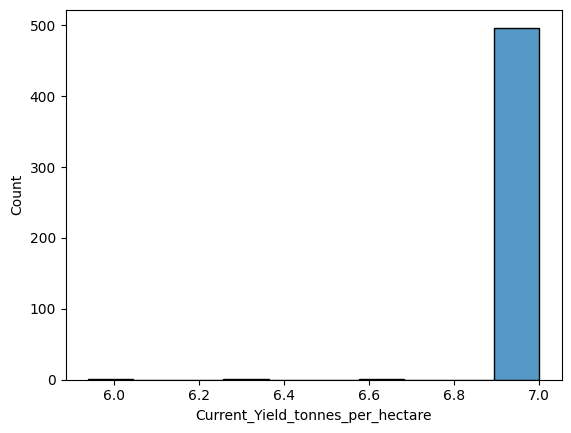

In [10]:
sns.histplot(data=data, x='Current_Yield_tonnes_per_hectare')
plt.show()

correlation

In [12]:
numeric_data = data.select_dtypes(include=np.number)
display(numeric_data.corr())

,Soil_Quality,Avg_Rainfall_mm,Avg_Temperature_C,Altitude_meters,Fertilizer_Usage_kg_per_acre,Prev_Season_Yield,Farming_Experience_Years,Year,Current_Yield_tonnes_per_hectare
Soil_Quality,1.000000,0.124865,0.006399,-0.076732,0.074787,-0.034172,-0.055095,0.023574,0.076513
Avg_Rainfall_mm,0.124865,1.000000,-0.052775,-0.060361,-0.005944,0.017453,0.036060,0.021302,0.151870
Avg_Temperature_C,0.006399,-0.052775,1.000000,0.049191,-0.012818,0.072014,-0.094260,-0.126302,0.076511
Altitude_meters,-0.076732,-0.060361,0.049191,1.000000,0.007048,0.060823,-0.035291,0.049476,-0.018393
Fertilizer_Usage_kg_per_acre,0.074787,-0.005944,-0.012818,0.007048,1.000000,-0.047992,-0.011623,-0.007648,0.038221
Prev_Season_Yield,-0.034172,0.017453,0.072014,0.060823,-0.047992,1.000000,0.050220,-0.047411,0.056319
Farming_Experience_Years,-0.055095,0.036060,-0.094260,-0.035291,-0.011623,0.050220,1.000000,0.078520,0.012610
Year,0.023574,0.021302,-0.126302,0.049476,-0.007648,-0.047411,0.078520,1.000000,-0.030280
Current_Yield_tonnes_per_hectare,0.076513,0.151870,0.076511,-0.018393,0.038221,0.056319,0.012610,-0.030280,1.000000


In [14]:
data.columns

Index(['Region', 'County', 'SubCounty', 'Soil_Quality', 'Avg_Rainfall_mm',
       'Avg_Temperature_C', 'Altitude_meters', 'Fertilizer_Usage_kg_per_acre',
       'Fertilizer_Type', 'Seed_Type', 'Farming_Method', 'Pest_Attack_Level',
       'Prev_Season_Yield', 'Farming_Experience_Years', 'Planting_Season',
       'Year', 'Current_Yield_tonnes_per_hectare'],
      dtype='object')

##  Corelation

<Axes: >

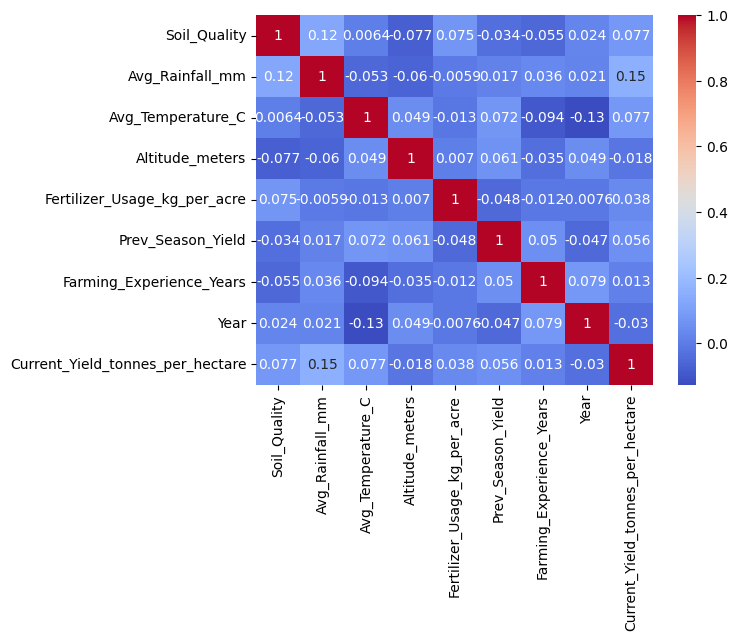

In [25]:
numeric_data = data.select_dtypes(include=[np.number])
corr = numeric_data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')


In [21]:
data = pd.get_dummies(data, columns=["Fertilizer_Type", "Seed_Type", "Farming_Method"], drop_first=True)

KeyError: "None of [Index(['Fertilizer_Type', 'Seed_Type', 'Farming_Method'], dtype='object')] are in the [columns]"